In [3]:
import cv2 

### Practice 1

In [5]:
# Load the pre-trained Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load the input image
image = cv2. imread ('images/tic.jpg')

# resize images
#image= cv2.resize(image, (770,570))

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform face detection
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5, minSize=(10,30))


# Draw bounding boxes around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the output image
cv2. imshow( 'Face Detection', image) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

2025-04-10 11:10:51.511 python[13371:830630] +[IMKClient subclass]: chose IMKClient_Modern


In [5]:
import cv2
print(cv2.__version__)

4.10.0


### Practice 2

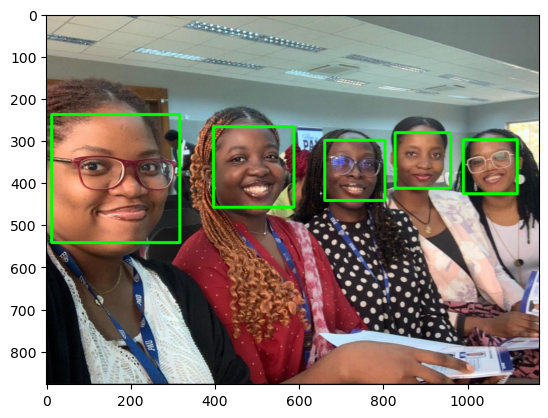

In [11]:
import cv2
from matplotlib import pyplot as plt

# Opening image
img = cv2. imread("images/friends.jpg")

# OpenCV opens images as BRG
# but we want it as RGB We'LL

# also need a grayscale version
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Perform face detection
face_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

found = face_data.detectMultiScale(img_gray,
                                   minSize =(20, 20))

# Don't do anything if there's no sign
amount_found = len(found)

if amount_found != 0:
    
    # There may be more than one
    # sign in the image
    for (x, y, width, height) in found:
        # We draw a green rectangle around
        # every recognized sign
        cv2. rectangle(img_rgb, (x, y) ,
            (x + height, y + width),
            (0, 255, 0), 5)
# Creates the environment of
# the picture and shows it
plt.subplot(1, 1, 1) 
plt.imshow(img_rgb)
plt.show()

### Practice 3

In [ ]:
import cv2
import numpy as np

# Load YOLO
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
classes = []
with open('coco.names', 'r') as f:
    classes = f.read().splitlines()

# Load input image
image = cv2.imread('images/lake.jpg')
height, width, _ = image.shape

# Preprocess input image
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)

# Forward pass through the network
output_layers_names = net.getUnconnectedOutLayersNames()
layer_outputs = net.forward(output_layers_names)

# Process detection results
boxes = []
confidences = []
class_ids = []

for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Non-max suppression to remove redundant overlapping boxes
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Draw bounding boxes and labels
for i in indexes.flatten():
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = str(round(confidences[i], 2))
    color = colors[i]
    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
    cv2.putText(image, label + " " + confidence, (x, y + 20), font, 2, (255, 255, 255), 2)

# Display the output image
cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

2025-04-10 11:42:20.045 python[13584:836049] +[IMKClient subclass]: chose IMKClient_Modern
